In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

In [4]:
df = pd.read_csv('data/eqn3_female_activity.csv')
df.head()

,ST,SC,OBC,Islam,Christianity,Sikkhism,Jainism,Buddhism,Zoroastrianism,others,...,TEL,target_paid_activity_time,target_unpaid_activity_time,target_leisure_time,target_cooking_time,target_cleaning_time,target_firewood_time,target_washing_time,target_hh_time,target_care_time
0,0,0,1,0,0,0,0,0,0,0,...,0,300.0,225.0,195.0,165.0,0.0,0.0,0.0,165.0,60.0
1,0,0,1,0,0,0,0,0,0,0,...,0,0.0,645.0,45.0,135.0,90.0,0.0,120.0,345.0,120.0
2,0,0,1,0,0,0,0,0,0,0,...,0,0.0,105.0,225.0,105.0,0.0,0.0,0.0,105.0,0.0
3,0,0,1,0,0,0,0,0,0,0,...,0,0.0,225.0,240.0,225.0,0.0,0.0,0.0,225.0,0.0
4,0,0,1,0,0,0,0,0,0,0,...,0,0.0,165.0,210.0,15.0,60.0,0.0,90.0,165.0,0.0


In [5]:
df.columns

Index(['ST', 'SC', 'OBC', 'Islam', 'Christianity', 'Sikkhism', 'Jainism',
       'Buddhism', 'Zoroastrianism', 'others', 'Urban', '25-50', '50-75',
       '75-100', 'Age (Young < Old)', 'Upto Middle School', 'Secondary',
       'Higher Secondary', 'Graduate and above', 'Currently Married',
       'Widowed', 'Divorced', 'Self-Employed', 'Salaried Employee',
       'Casual Labour', 'Piped Gas/LPG Present', 'electricity',
       'washing_Manual', 'washing_Mechanised', 'washing_Outsourcing',
       'sweeping_Manual', 'sweeping_Mechanised', 'sweeping_Outsourcing',
       'Child', 'Dependent Adult', 'Unemployed Working-age Men', 'J&K', 'HP',
       'PUN', 'CH', 'UK', 'HAR', 'DEL', 'RJ', 'UP', 'BH', 'SIK', 'ANP', 'NL',
       'MAN', 'MIZ', 'TRI', 'MEG', 'AS', 'WB', 'JHA', 'ODI', 'CG', 'MP', 'GUJ',
       'D&D', 'D&N', 'MR', 'AP', 'KAR', 'GOA', 'LD', 'KER', 'TN', 'PU', 'A&N',
       'TEL', 'target_paid_activity_time', 'target_unpaid_activity_time',
       'target_leisure_time', 'target_cooking

In [8]:
targets = df.columns[-9:]

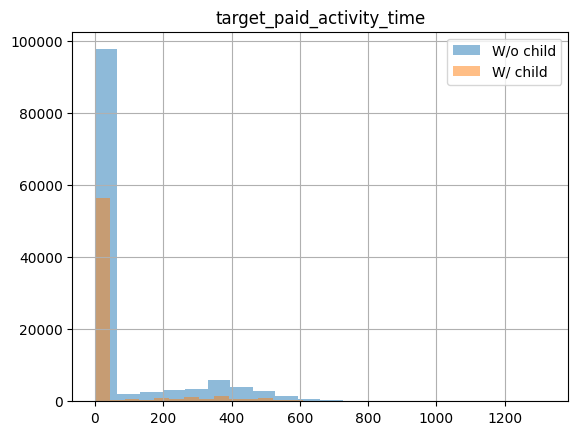

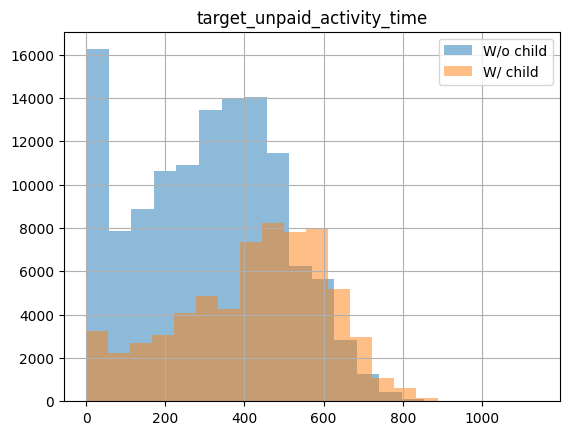

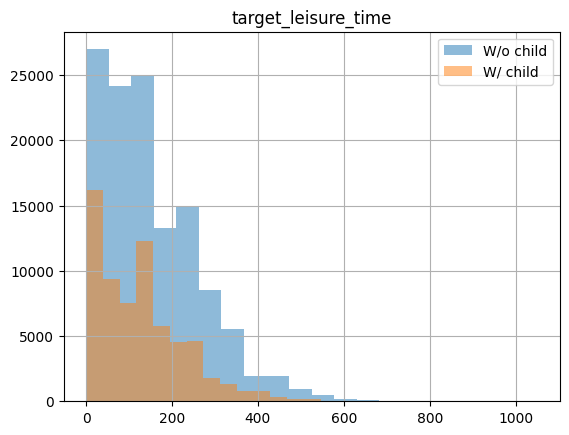

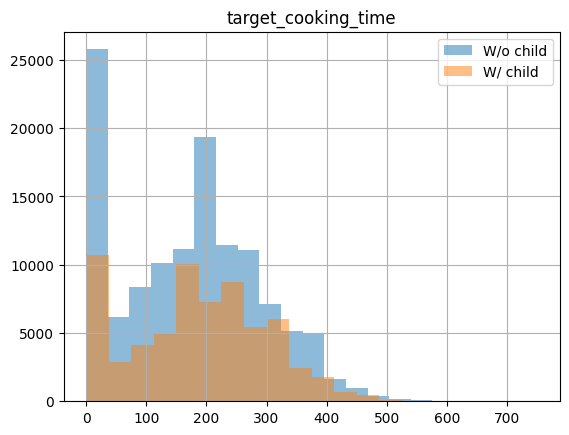

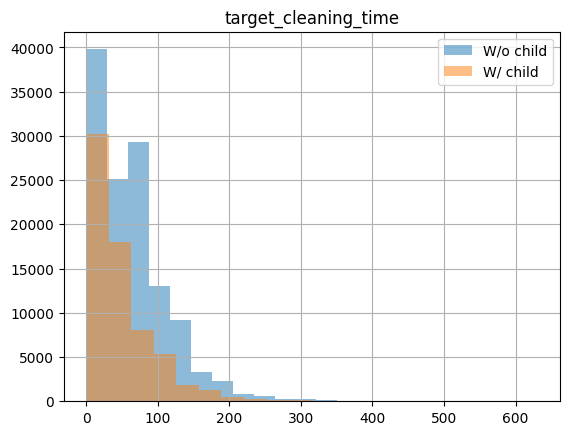

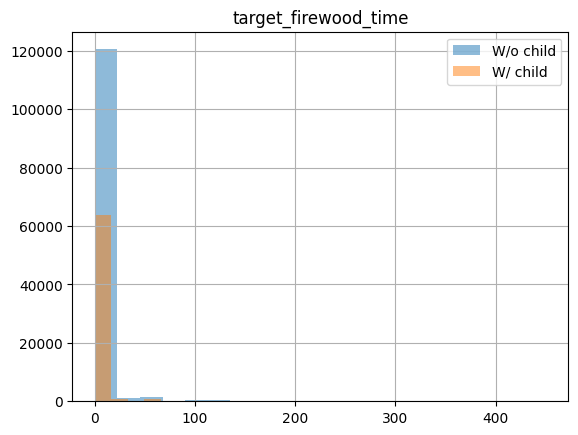

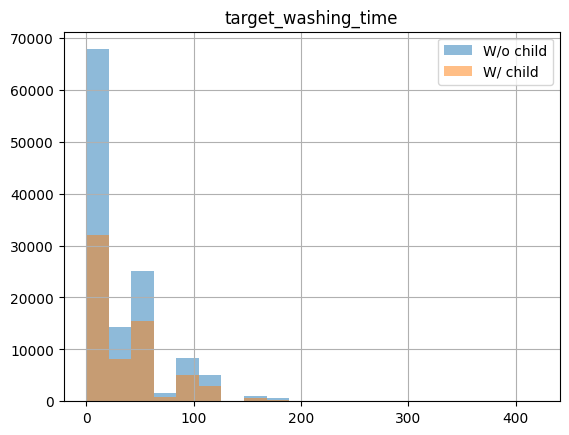

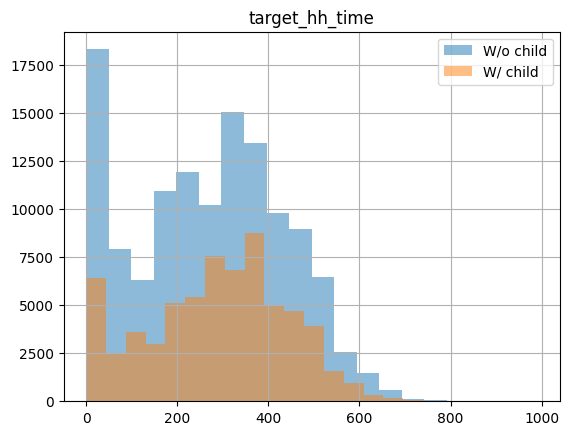

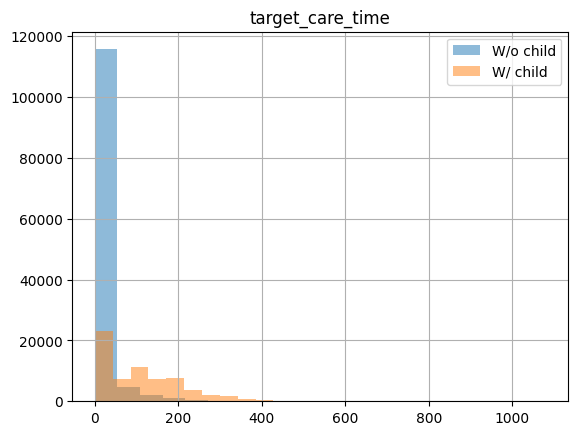

In [14]:
for t in targets:
    plt.figure()
    ax = plt.gca()
    X = df[df['Child'] == 0][t]
    X.hist(bins=20, ax=ax, alpha=0.5, label='W/o child')
    df[df['Child'] == 1][t].hist(bins=20, ax=ax, alpha=0.5, label='W/ child')
    ax.set_title(t)
    ax.legend()

In [15]:
df.columns

Index(['ST', 'SC', 'OBC', 'Islam', 'Christianity', 'Sikkhism', 'Jainism',
       'Buddhism', 'Zoroastrianism', 'others', 'Urban', '25-50', '50-75',
       '75-100', 'Age (Young < Old)', 'Upto Middle School', 'Secondary',
       'Higher Secondary', 'Graduate and above', 'Currently Married',
       'Widowed', 'Divorced', 'Self-Employed', 'Salaried Employee',
       'Casual Labour', 'Piped Gas/LPG Present', 'electricity',
       'washing_Manual', 'washing_Mechanised', 'washing_Outsourcing',
       'sweeping_Manual', 'sweeping_Mechanised', 'sweeping_Outsourcing',
       'Child', 'Dependent Adult', 'Unemployed Working-age Men', 'J&K', 'HP',
       'PUN', 'CH', 'UK', 'HAR', 'DEL', 'RJ', 'UP', 'BH', 'SIK', 'ANP', 'NL',
       'MAN', 'MIZ', 'TRI', 'MEG', 'AS', 'WB', 'JHA', 'ODI', 'CG', 'MP', 'GUJ',
       'D&D', 'D&N', 'MR', 'AP', 'KAR', 'GOA', 'LD', 'KER', 'TN', 'PU', 'A&N',
       'TEL', 'target_paid_activity_time', 'target_unpaid_activity_time',
       'target_leisure_time', 'target_cooking

In [16]:
x = pd.read_stata('data/ml_data.dta')

In [17]:
[c for c in x if 'child' in c.lower()]

['child_care_time', 'child', 't_child', 'old_child', 'Old_child', 'child_care']

In [18]:
x['child']

0          HH with children beloww age 6 
1          HH with children beloww age 6 
2          HH with children beloww age 6 
3          HH with children beloww age 6 
4         HH with no children below age 6
                       ...               
445290    HH with no children below age 6
445291    HH with no children below age 6
445292    HH with no children below age 6
445293    HH with no children below age 6
445294    HH with no children below age 6
Name: child, Length: 445295, dtype: category
Categories (2, object): ['HH with no children below age 6' < 'HH with children beloww age 6 ']

In [22]:
[c for c in x if 'gender' in c.lower()]

['Gender']

In [23]:
x['Gender'].unique()

['Male', 'Female', 'Third Gender']
Categories (3, object): ['Male' < 'Female' < 'Third Gender']

In [24]:
x = x[x['Gender'] == 'Female']

In [30]:
x = x[x['Age'] >= 15]

In [31]:
x['women_working']

1         HH with no women of working age
3         HH with no women of working age
4         HH with no women of working age
6         HH with no women of working age
8         HH with no women of working age
                       ...               
445282    HH with no women of working age
445284    HH with no women of working age
445286    HH with no women of working age
445288    HH with no women of working age
445291    HH with no women of working age
Name: women_working, Length: 189851, dtype: category
Categories (2, object): ['HH with no women of working age' < 'HH with women of working age ']

In [33]:
[c for c in x if 'time' in c.lower()]
cols = ['care_time', 'hh_time', 'child_care_time', 'adult_care_time', 'emp_time',
        'cooking_time', 'collection_time', 'cleaning_time', 'firewood_time', 'washing_time',
        'paid_activity_time', 'unpaid_activity_time', 'leisure_time']

In [35]:
x.groupby('child')[cols].mean()

,care_time,hh_time,child_care_time,adult_care_time,emp_time,cooking_time,collection_time,cleaning_time,firewood_time,washing_time,paid_activity_time,unpaid_activity_time,leisure_time
child,,,,,,,,,,,,,
HH with no children below age 6,8.815639,267.164948,7.238331,1.577308,80.960541,168.602341,6.783676,51.666908,2.032527,30.070133,74.105156,304.550110,145.187912
HH with children beloww age 6,105.167549,286.718689,103.814758,1.352791,50.008965,183.543335,6.416772,53.362411,2.054528,34.021671,46.083950,420.685089,123.439613


In [36]:
from scipy.stats import ttest_ind

In [68]:
a = x[x['child'] == 'HH with no children below age 6']['washing_time']
b = x[x['child'] == 'HH with children beloww age 6 ']['washing_time']
ttest_ind(a, b, alternative='less')

Ttest_indResult(statistic=-20.775751818594582, pvalue=4.58736616580359e-96)